## IMPORT LIBRARIES

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


## TASK 1 

### LOAD THE DATASET

In [6]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Features:", iris.feature_names)
print("Classes:", iris.target_names)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


In [7]:
iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


 ## Task 2: Visualize the Dataset

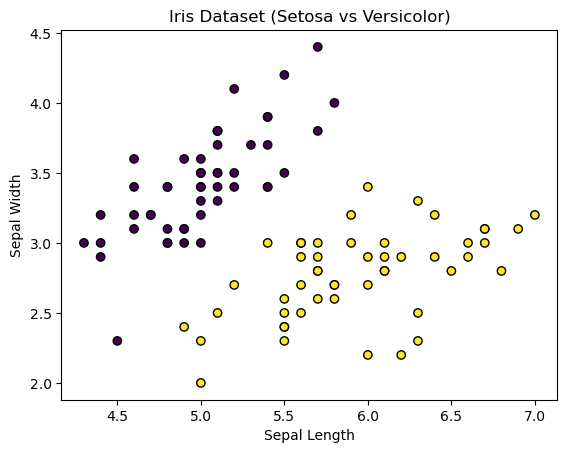

In [8]:


plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()

## ## Task 3: Train a Basic KNN Model (k = 3)

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


## Fit a KNeighborsClassifier

In [10]:
# Create KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Make the Prediction

In [11]:
# Predict on test data
y_pred = knn.predict(X_test)

print("Predicted values:", y_pred)
print("Actual values   :", y_test)


Predicted values: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]
Actual values   : [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]


## Check for the Accuracy

In [12]:


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


# TASK 4

## Predictions for Different Values of k


In [13]:
X, y = load_iris(return_X_y=True)
X, y = X[y < 2, :2], y[y < 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"k={k}, Accuracy={accuracy_score(y_test, knn.predict(X_test)):.2f}")


k=1, Accuracy=1.00
k=3, Accuracy=1.00
k=5, Accuracy=1.00


## ## Task 5: 

### Decision Boundary Function (Provided)

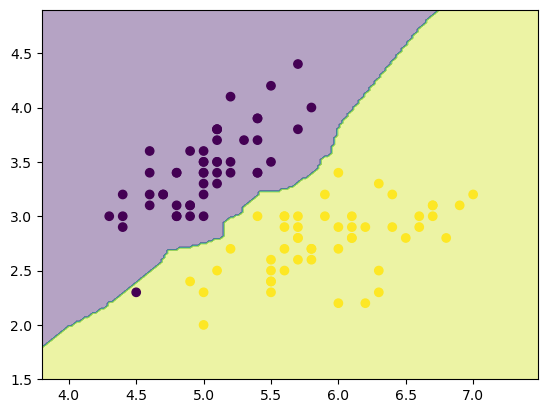

In [16]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

xx, yy = np.meshgrid(
    np.arange(X[:,0].min()-0.5, X[:,0].max()+0.5, 0.02),
    np.arange(X[:,1].min()-0.5, X[:,1].max()+0.5, 0.02)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


## TASK 6

## IF K = 1

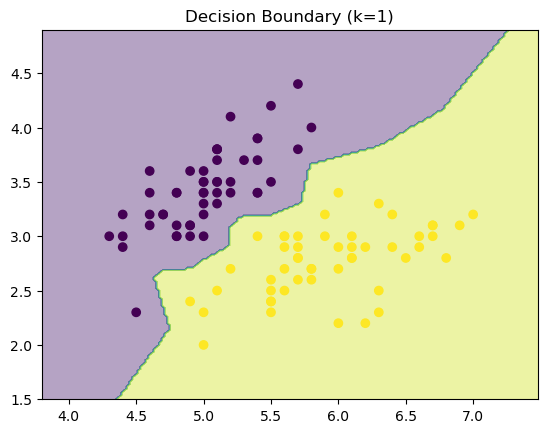

In [20]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

xx, yy = np.meshgrid(
    np.arange(X[:,0].min()-0.5, X[:,0].max()+0.5, 0.02),
    np.arange(X[:,1].min()-0.5, X[:,1].max()+0.5, 0.02)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Decision Boundary (k=1)")
plt.show()


## IF K = 3

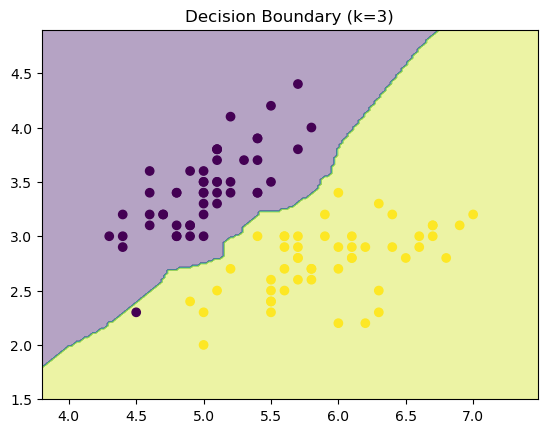

In [21]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

xx, yy = np.meshgrid(
    np.arange(X[:,0].min()-0.5, X[:,0].max()+0.5, 0.02),
    np.arange(X[:,1].min()-0.5, X[:,1].max()+0.5, 0.02)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Decision Boundary (k=3)")
plt.show()


## IF K = 5

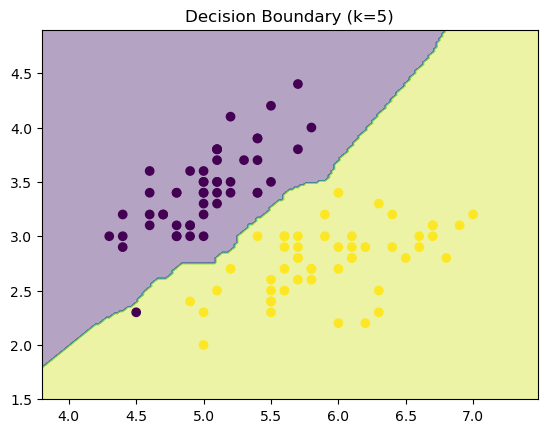

In [22]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

xx, yy = np.meshgrid(
    np.arange(X[:,0].min()-0.5, X[:,0].max()+0.5, 0.02),
    np.arange(X[:,1].min()-0.5, X[:,1].max()+0.5, 0.02)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Decision Boundary (k=5)")
plt.show()


## IF K = 11

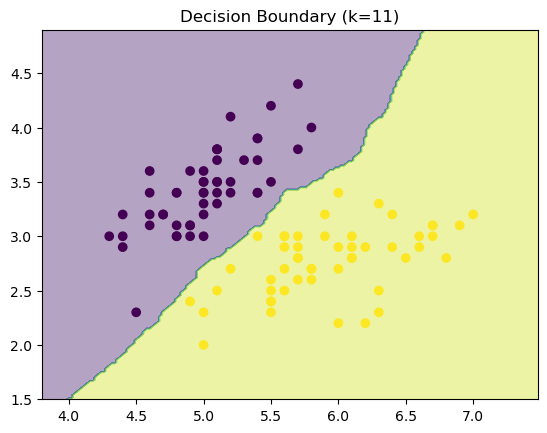

In [23]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)

xx, yy = np.meshgrid(
    np.arange(X[:,0].min()-0.5, X[:,0].max()+0.5, 0.02),
    np.arange(X[:,1].min()-0.5, X[:,1].max()+0.5, 0.02)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Decision Boundary (k=11)")
plt.show()


# TASK 7

## Effect of Distance Metric

In [24]:
for m in ['euclidean', 'manhattan', 'minkowski']:
    knn = KNeighborsClassifier(n_neighbors=5, metric=m)
    knn.fit(X_train, y_train)
    print(m, accuracy_score(y_test, knn.predict(X_test)))


euclidean 1.0
manhattan 1.0
minkowski 1.0


## TASK 8 